In [21]:
%pip install pymongo --user
%pip install pandas --user

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [185]:
# -*- coding: utf-8 -*-
from pymongo import MongoClient
import datetime
import time
import pymongo
import pandas as pd
import os
import requests
import ast
from ast import literal_eval

#from datetime import datetime

In [186]:
# DB Config
MONGODB_ADDRESS    = os.environ.get('KEY_MONGO_ADDRESS','mongodb-service.stag-data.svc.cluster.local')
MONGODB_PORT       = os.environ.get('KEY_MONGO_PORT', '27017')
MONGODB_USERNAME   = os.environ.get('KEY_MONGO_USER', 'IBSO-read-write')
MONGODB_PASSWORD   = os.environ.get('KEY_MONGO_PASSWORD', 'NHWD5bw0xcMgy1Y')
MONGODB_DATABASE   = os.environ.get('KEY_MONGO_DATABASE', 'admin')

In [165]:
def connect_mongo():
    try:
        mongo_client = MongoClient(
            ('mongodb://%s:%s@' + MONGODB_ADDRESS + ':' + MONGODB_PORT + '/' + MONGODB_DATABASE) % (
                MONGODB_USERNAME, MONGODB_PASSWORD),
            replicaset='rs0')
        return mongo_client
    except:
        print("connection wrong")
        exit()

In [166]:
# Set up db connection
mongo_client = connect_mongo()

# UC2 - Solution Finder - Automatic Validation

In [167]:

infodocs_metadata_cloud = mongo_client['IBSO']['infodocs_metadata_cloud_only']
release_2202_df = pd.DataFrame(infodocs_metadata_cloud.find({'prod_version': 'SAP S/4HANA CLOUD 2202'}))
duplets_to_remove = release_2202_df[['customer_no', 'installation_no']].drop_duplicates()
all_cloud_df = pd.DataFrame(infodocs_metadata_cloud.find({}))
ind_to_remove = pd.Int64Index([])
for row in duplets_to_remove.iloc:
    ind_to_remove = ind_to_remove.join(all_cloud_df[(all_cloud_df['customer_no'] == row['customer_no']) & (all_cloud_df['installation_no'] == row['installation_no'])].index, how='outer')
filtered_df = all_cloud_df.drop(index=ind_to_remove)


In [147]:
release_2202_df.shape
release_2202_df.columns

Index(['_id', 'css_object_id', 'incident_created_at_dt', 'customer_name',
       'customer_no', 'component', 'description', 'prod_version',
       'communication_logs', 'solns', 'description_problem_description',
       'Reply', 'installation_no', 'system_no'],
      dtype='object')

In [148]:
release_2202_df[['component', 'solns']][0:10]

,component,solns
0,X4-CBC-PRX,"[0000000010, 0000067739]"
1,BC-NEO-CIS-OPS,"[0003090520, 0003090520]"
2,X4-CBC-BCL,[0000000010]
3,FI-GL-GL-N,[0002594771]
4,FI-FIO-GL,[0002594771]
5,PM-EQM-EQ,[0002840635]
6,PS,[0002673882]
7,FI-FIO-GL-MD,[0000560499]
8,X4-CBC-SSC,[0003207860]
9,PP-MRP,[0002594771]


In [149]:
release_2202_df[0:10]

,_id,css_object_id,incident_created_at_dt,customer_name,customer_no,component,description,prod_version,communication_logs,solns,description_problem_description,Reply,installation_no,system_no
0,635a8853ef9125b221068e4d,002075129400003366342022,2022-05-05 13:33:14,,,X4-CBC-PRX,CBC URL - UNAUTHORIZED,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...","[0000000010, 0000067739]",CBC URL - UNAUTHORIZED. Product Area selected:...,,0090734847,741286398
1,635a8853ef9125b221068e89,002075129500003324172022,2022-05-06 10:55:21,,,BC-NEO-CIS-OPS,SAP BTP URL,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...","[0003090520, 0003090520]",SAP BTP URL. Product Area selected: SAP S/4HAN...,,0090734847,741286398
2,635a8853ef9125b221068ebb,002075129400003411872022,2022-05-07 06:11:03,,,X4-CBC-BCL,SAP CBC URL Process is running from long time,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0000000010],SAP CBC URL Process is running from long time....,,0090734847,741286398
3,635a8853ef9125b221069200,002075129400003925982022,2022-05-25 11:22:06,,,FI-GL-GL-N,Authorisation error in Renumber G/L Accounts,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0002594771],Authorisation error in Renumber G/L Accounts. ...,,0090734847,741632608
4,635a8853ef9125b221069203,002075129400003925772022,2022-05-25 11:26:05,,,FI-FIO-GL,Chart of account assignment,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0002594771],Chart of account assignment. --- Support Assis...,,0090734847,741632608
5,635a8853ef9125b221069208,002075129500003775032022,2022-05-25 11:49:05,,,PM-EQM-EQ,Equipment Category is missing in SAP Cloud,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0002840635],Equipment Category is missing in SAP Cloud. Pr...,,0090734847,741632608
6,635a8853ef9125b22106920a,002075129400003927312022,2022-05-25 12:01:07,,,PS,Project System Coding Mask Issue,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0002673882],Project System Coding Mask Issue. Product Area...,,0090734847,741632608
7,635a8853ef9125b22106920e,002028376700034538692022,2022-05-25 12:44:44,,,FI-FIO-GL-MD,manage G/l account,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0000560499],manage G/l account. --- Support Assistant ---P...,,0090734847,741632608
8,635a8853ef9125b221069210,002075129500003777182022,2022-05-25 12:51:17,,,X4-CBC-SSC,Project Control - Capital Project Tiles Hide,SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0003207860],Project Control - Capital Project Tiles Hide....,,0090734847,741632608
9,635a8853ef9125b221069211,002075129400003929742022,2022-05-25 13:02:05,,,PP-MRP,"Configuration Error For ""specifying sheduling ...",SAP S/4HANA CLOUD 2202,"[{'datetime': '', 'text': '<p>', 'type': ''}, ...",[0002594771],"Configuration Error For ""specifying sheduling ...",,0090734847,741632608


In [169]:
all_cloud_df.shape
all_cloud_df.dtypes

_id                                        object
component                                  object
css_object_id                              object
customer_name                              object
customer_no                                object
description                                object
description_problem_description            object
incident_created_at_dt             datetime64[ns]
prod_version                               object
Reply                                      object
communication_logs                         object
solns                                      object
installation_no                            object
system_no                                  object
dtype: object

In [151]:
filtered_df.shape

(41532, 14)

In [183]:
dum = all_cloud_df.groupby(["customer_no", "installation_no"], as_index=False)["solns"].count()
dum

,customer_no,installation_no,solns
0,,0020568971,7
1,,0020848565,21
2,,0090353822,1
3,,0090368653,1
4,,0090403828,5
...,...,...,...
3390,0002699397,0020848565,3
3391,0002699397,0090736272,1
3392,0002712036,0020848565,3
3393,0002729008,0020848565,4


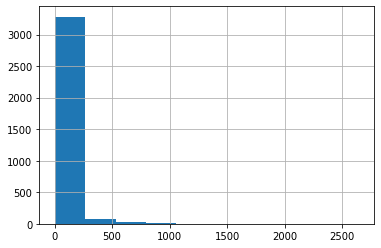

In [184]:
hist = dum['solns'].hist()

In [178]:
dum['solns'].describe()

count    3395.000000
mean       45.656554
std       112.816839
min         1.000000
25%         3.000000
50%        10.000000
75%        39.000000
max      2647.000000
Name: solns, dtype: float64

In [152]:
soln_list =  (list(set([a for b in release_2202_df.solns.tolist() for a in b])))

In [153]:
len(soln_list)

1414

In [154]:
soln_list[0:10]

['0002833569',
 '0002844952',
 '0003197566',
 '0002715686',
 '0003133023',
 '0002884902',
 '0002588361',
 '0002475649',
 '0002435438',
 '0002926267']

In [155]:
all_cloud_df['installation_no'][0:10]

0    0090316691
1    0090316691
2    0090316691
3    0090316691
4    0090316691
5    0090316691
6    0090316691
7    0090297162
8    0090297162
9    0090281954
Name: installation_no, dtype: object

In [156]:
cust_num = '1847473'
install_num = '20848565'
df_filter = all_cloud_df[(all_cloud_df['customer_no'] == cust_num) & (all_cloud_df['installation_no'] == install_num)]


In [157]:
df_filter.shape

(0, 14)

In [158]:
df_filter['solns']

Series([], Name: solns, dtype: object)

In [159]:
soln_list =  (list(set([a for b in df_filter.solns.tolist() for a in b])))
input_soln_list = soln_list
input_soln_list

[]

In [160]:
def Case1_overlap_stats(cust_num, install_num,  input_soln_list):
    df_filter = all_cloud_df[(all_cloud_df['customer_no'] == cust_num) & (all_cloud_df['installation_no'] == install_num)]
    soln_list =  (list(set([a for b in df_filter.solns.tolist() for a in b])))
    lst3 = [value for value in soln_list if value in input_soln_list]
    fraction_present = len(lst3)/len(input_soln_list)
    return(fraction_present)


In [161]:
def Case1_overlap_stats_2(cust_num, install_num, incident_dt, input_soln_list):
    df_filter = all_cloud_df[(all_cloud_df['customer_no'] == cust_num) & (all_cloud_df['installation_no'] == install_num)
                            & (all_cloud_df['incident_created_at_dt' ] > incident_dt)]
    soln_list =  (list(set([a for b in df_filter.solns.tolist() for a in b])))
    lst3 = [value for value in soln_list if value in input_soln_list]
    fraction_present = len(lst3)/len(input_soln_list)
    return(fraction_present)


    

In [46]:
cust_num = str(df_Case_1_validation['customer_no'][0])
#cust_num
install_num = str(df_Case_1_validation['installation_no'][0])
#install_num
input_soln_list = df_Case_1_validation['filtered_solns'][0]
#input_soln_list

In [47]:
Case1_overlap_stats(cust_num, install_num, input_soln_list)

0.0

In [ ]:



latest_actual_dt = list(infodocs_metadata_cloud.find({'prod_version': 'SAP S/4HANA CLOUD 2202'}).sort('incident_created_at_dt', -1).limit(1))[0]['incident_created_at_dt']
latest_dt = latest_actual_dt - timedelta(days=61)
filtered_df = pd.DataFrame(infodocs_metadata_cloud.find({'incident_created_at_dt': {
    '$lt': latest_dt
}}))

Read in the validation file with customer number, installation number, created date and solutions

In [130]:
df_Case_1_validation = pd.read_csv("UC1_auto_validation_scenario_1_testing.csv")

In [131]:
df_Case_1_validation.shape
df_Case_1_validation.dtypes

#df_Case_1_validation.columns

queryId                   float64
filtered_solns             object
incident_created_at_dt     object
customer_no                 int64
installation_no             int64
dtype: object

In [132]:
# treat the column with a list so the input is read correctly as a list
df_Case_1_validation.filtered_solns = df_Case_1_validation.filtered_solns.apply(literal_eval)
#df_Case_1_validation.incident_created_at_dt = df_Case_1_validation.incident_created_at_dt.apply(literal_eval)
                                                                    
                                  

In [133]:
# convert the incident_created_at_dt field to datetime
df_Case_1_validation['incident_created_at_dt'] = pd.to_datetime(df_Case_1_validation['incident_created_at_dt'])

In [134]:
# left pad the customer number with zeros to length 10 
df_Case_1_validation['customer_no_padded'] = df_Case_1_validation.apply(lambda row: str(row.customer_no).zfill(10), axis = 1)
# left pad the installation number with zeros to length 10 
df_Case_1_validation['installation_no_padded'] = df_Case_1_validation.apply(lambda row: str(row.installation_no).zfill(10), axis = 1)
                                                                       

In [135]:
df_Case_1_validation["customer_no_padded"][0:10]
df_Case_1_validation["installation_no_padded"][0:10]

0    0020848565
1    0020848565
2    0020589109
3    0020848565
4    0020848565
5    0020848565
6    0020848565
7    0020848565
8    0020848565
9    0020848565
Name: installation_no_padded, dtype: object

In [136]:
df_Case_1_validation['Precision'] = df_Case_1_validation.apply(lambda row : Case1_overlap_stats(row['customer_no_padded'],
                     row['installation_no_padded'], row['filtered_solns']), axis = 1)

In [137]:
df_Case_1_validation['Precision_2'] = df_Case_1_validation.apply(lambda row : Case1_overlap_stats_2(row['customer_no_padded'],
                     row['installation_no_padded'], row['incident_created_at_dt'], row['filtered_solns']), axis = 1)
  

In [101]:
df_Case_1_validation['Precision'][0:100]

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
95    0.0
96    0.0
97    0.0
98    0.0
99    0.0
Name: Precision, Length: 100, dtype: float64

In [140]:
df_Case_1_validation['Precision_2'].describe()

count    439.000000
mean       0.000797
std        0.012841
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.250000
Name: Precision_2, dtype: float64

In [141]:
df_Case_1_validation

,queryId,filtered_solns,incident_created_at_dt,customer_no,installation_no,customer_no_padded,installation_no_padded,Precision,Precision_2
0,2.024210e+21,[3150602],2022-02-05 01:11:00,1847473,20848565,0001847473,0020848565,1.0,0.0
1,2.024210e+21,[2985592],2022-02-15 11:27:00,488721,20848565,0000488721,0020848565,1.0,0.0
2,2.024210e+21,"[, 3131775]",2022-02-17 11:26:00,1674281,20589109,0001674281,0020589109,0.5,0.0
3,2.024210e+21,[3087004],2022-02-21 15:26:00,321101,20848565,0000321101,0020848565,1.0,0.0
4,2.024210e+21,"[, 3091602]",2022-02-23 03:25:00,749349,20848565,0000749349,0020848565,0.5,0.0
...,...,...,...,...,...,...,...,...,...
434,2.075130e+21,"[2810311, 2780129, 3122430, 2710764, 3110900, ...",2022-07-06 14:54:00,1784823,90354100,0001784823,0090354100,0.0,0.0
435,2.075130e+21,"[2829755, 3113415, 3193185, 2732840, 1271517, ...",2022-07-07 08:09:00,1898421,90413788,0001898421,0090413788,0.3,0.0
436,2.075130e+21,"[3090203, 2898414, 2434549, 3007837, 2982108, ...",2022-07-08 15:53:00,2496623,90537200,0002496623,0090537200,0.0,0.0
437,2.075130e+21,"[, 2829433, 1980679, 456691, 3102374, 2978407,...",2022-07-11 01:55:00,2446229,90539702,0002446229,0090539702,0.0,0.0


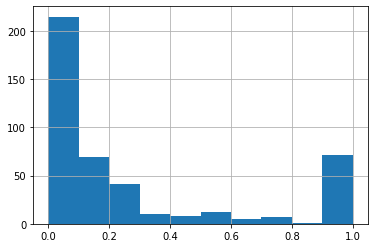

In [138]:
hist = df_Case_1_validation['Precision'].hist()

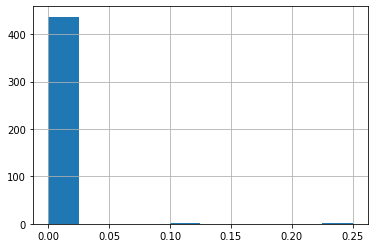

In [139]:
hist = df_Case_1_validation['Precision_2'].hist()

In [67]:
df_Case_1_validation.to_csv("UC2_Solution_auto_validation_Scenario_1.csv")

In [74]:
df_Case_1_validation['Precision']

0      1.0
1      1.0
2      0.5
3      1.0
4      0.5
      ... 
434    0.0
435    0.3
436    0.0
437    0.0
438    0.0
Name: Precision, Length: 439, dtype: float64